# MRI and TSV preprocessing 

## Imports

The data will be processed using 

In [5]:
import os       # using operating system dependent functionality (folders)
import glob
import pandas as pd # data analysis and manipulation
import numpy as np    # numerical computing (manipulating and performing operations on arrays of data)
import copy     # Can Copy and Deepcopy files so original file is untouched.
from ipywidgets import IntSlider, Output
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import SimpleITK as sitk
import skimage

import sys
sys.path.insert(0, '../') # path to functions
from brainspin import file_handler as fh # 
from brainspin import mold #
from brainspin import carve
from file_handler import Config

## Load files

Use the config pathways for the different datasets

In [6]:
config = Config()
root_mri_directory = config.get_directory('root_mri_directory')

In [7]:
tsv_pattern = os.path.join(root_mri_directory, '**/*.tsv')
tsv_files = glob.glob(tsv_pattern, recursive=True)


In [8]:
tsv_files

['C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_DeepWM_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_Hammers_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_Tatu_ACA_MCA_PCA_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_Tatu_ACA_MCA_PCA_Prox_Med_Dist_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\CoV_qCBF_StandardSpace_TotalGM_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\mean_qCBF_StandardSpace_DeepWM_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\mean_qCBF_StandardSpace_Hammers_n=1670_29-Sep-2022_PVC2.tsv',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\mean_qCBF_StandardSpace_Tatu_ACA_MCA_

In [9]:
dataframe_example = pd.read_csv(tsv_files[0], sep='\t')

In [10]:
dataframe_example

,participant_id,session,LongitudinalTimePoint,SubjectNList,Site,GM_vol,WM_vol,CSF_vol,GM_ICVRatio,GMWM_ICVRatio,WMH_vol,WMH_count,MeanMotion,DeepWM_B,DeepWM_L,DeepWM_R
0,StudyID,...,integer,integer,integer,Liter,Liter,Liter,ratio GM/ICV,ratio (GM+WM)/ICV,mL,n lesions (integer),mm,SD/mean,SD/mean,SD/mean
1,sub-100151241_1,ASL_1,TimePoint_1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,sub-100151242_1,ASL_1,TimePoint_1,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,sub-10015124_1,ASL_1,TimePoint_1,3,1,0.56794,0.47687,0.34052,0.40997,0.7542,4.889,16,0.16098,10.9918,10.8279,11.0443
4,sub-10015124_2,ASL_1,TimePoint_2,3,1,0.56664,0.4727,0.34156,0.41034,0.75265,7.444,19,0.17257,7.9018,9.0773,6.8846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,sub-19995714_2,ASL_1,TimePoint_2,1300,1,0.63999,0.54546,0.42336,0.3978,0.73685,1.735,23,0.09423,20.3281,16.4068,25.2544
1667,sub-199968291_1,ASL_1,TimePoint_1,1301,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,sub-199968292_1,ASL_1,TimePoint_1,1302,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1669,sub-19996829_1,ASL_1,TimePoint_1,1303,1,0.52206,0.45926,0.4026,0.37723,0.70909,15.875,41,NaN,NaN,NaN,NaN


In [11]:
mri_pattern = os.path.join(root_mri_directory, '**/*.gz')
gz_files = glob.glob(mri_pattern, recursive=True)

In [12]:
gz_files

['C:/Projects/brainspin/not_pushed/data_anonymized\\EPAD\\040EPAD00007_3\\ASL_1\\CBF.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\EPAD\\040EPAD00007_3\\ASL_1\\M0.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\EPAD\\040EPAD00007_3\\ASL_1\\PWI.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\HCP\\HCA6061757\\T1.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\HCP\\HCA6061757\\T2w.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\FLAIR.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\T1_ORI.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\ASL_1\\ASL4D.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\ASL_1\\CBF.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19996829_2\\ASL_1\\M0.nii.gz',
 'C:/Projects/brainspin/not_pushed/data_anonymized\\Insight46\\sub-19

In [13]:
# here we can use something not in the base environment just to check that these files exist correctly



# A path to an mrid brain .nii image:
t1_fn = gz_files[0]

# Read the .nii image containing the volume with SimpleITK:
sitk_t1 = sitk.ReadImage(t1_fn)

# and access the numpy array:
t1 = sitk.GetArrayFromImage(sitk_t1)

# now display it

In [14]:
t1.shape

(36, 64, 64)

In [15]:
# import plotly
# import plotly.express as px


# fig = px.imshow(
#     t1,
#     facet_col=1,
#     animation_frame=0,
#     binary_string=True,
#     binary_format="jpg",
# )
# fig.layout.annotations[0]["text"] = "Something0"
# fig.layout.annotations[1]["text"] = "Something2"
# plotly.io.show(fig)

In [18]:
sitk.Show(sitk_t1, debugOn=True)

RuntimeError: Exception thrown in SimpleITK Show: D:\bld\libsimpleitk_1670439920316\work\Code\IO\src\sitkImageViewer.cxx:620:
sitk::ERROR: No ImageJ/Fiji application found.

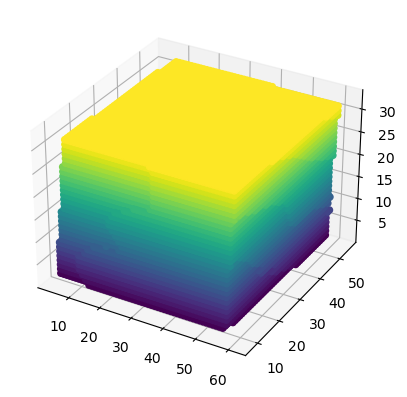

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = t1
z, x, y = data.nonzero()
ax.scatter(x, y, z, c=z, alpha=1)
plt.show()